### Importing necessary libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [78]:
print(tf. __version__)

2.17.0


### Defining the path of dataset directory

In [121]:
dataset_path = r"C:\Users\Ann Vincent\Desktop\Plant-Disease-Detection\Dataset"
dataset_path = "C:\\Users\\Ann Vincent\\Desktop\\Plant-Disease-Detection\\Dataset"
dataset_path = "C:/Users/Ann Vincent/Desktop/Plant-Disease-Detection/Dataset"
# Corrected path using raw string
dataset_path = r"C:\Users\Ann Vincent\Desktop\Plant-Disease-Detection\Dataset"

# Map directories to their corresponding label indices
dataset_label_mapping = {
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1": binary_labels[3],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+curl_stage2+sooty": binary_labels[4],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+sooty": binary_labels[5],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2": binary_labels[6],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2+sooty": binary_labels[7],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/healthy": binary_labels[8],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/leaf_enation": binary_labels[9]
}

### Visualizing the images and Resize images

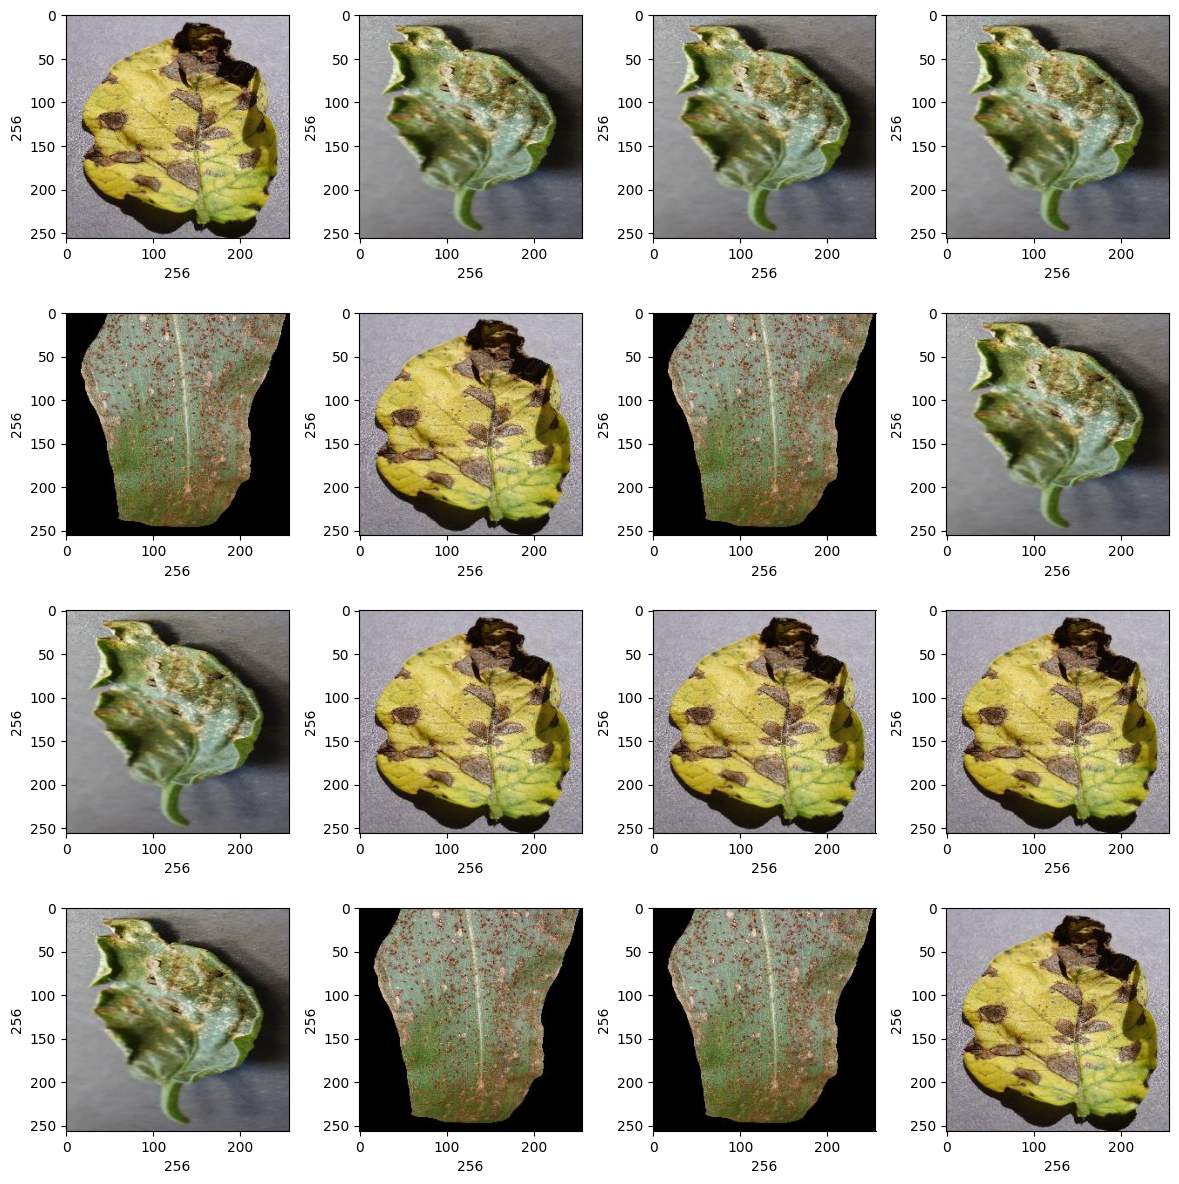

In [122]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Corrected path - ensure you are using the correct directory
dataset_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main\Test Image"

# Plotting 12 images to check the dataset
plt.figure(figsize=(12, 12))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    
    # Randomly select an image from the directory
    rand_img = imread(os.path.join(dataset_path, random.choice(sorted(os.listdir(dataset_path)))))
    
    # Display the image
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # Width of the image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # Height of the image

plt.show()


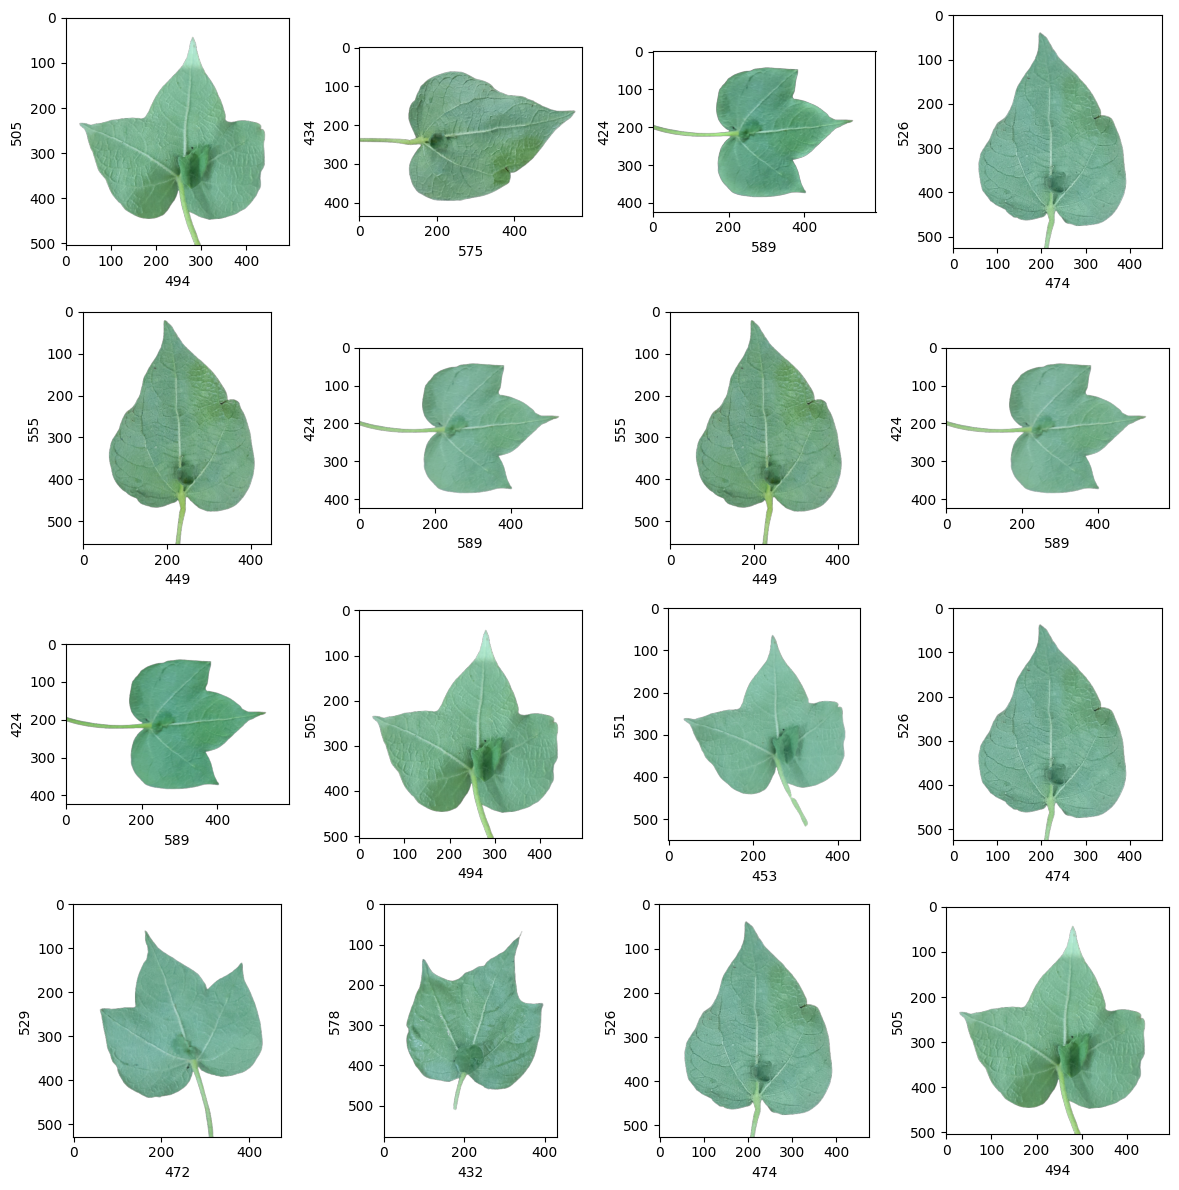

In [131]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Corrected path - ensure you are using the correct directory
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+curl_stage2+sooty"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+sooty"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2+sooty"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/healthy"
dataset_path = r"C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/leaf_enation"

# Plotting 12 images to check the dataset
plt.figure(figsize=(12, 12))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    
    # Randomly select an image from the directory
    rand_img = imread(os.path.join(dataset_path, random.choice(sorted(os.listdir(dataset_path)))))
    
    # Display the image
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # Width of the image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # Height of the image

plt.show()


### Convert the images into a Numpy array and normalize them

In [132]:
from os import listdir
import numpy as np
import cv2  # Ensure OpenCV is installed

# Define all relevant disease classes, including cotton diseases
all_labels = [
    'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot', 
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation'
]

# Create binary labels corresponding to the classes
binary_labels = list(range(len(all_labels)))  # Automatically generate indices for labels

# Map directories to their corresponding label indices
dataset_label_mapping = {
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1": binary_labels[3],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+curl_stage2+sooty": binary_labels[4],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage1+sooty": binary_labels[5],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2": binary_labels[6],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/curl_stage2+sooty": binary_labels[7],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/healthy": binary_labels[8],
    "C:/Users/Ann Vincent/OneDrive/Desktop/CoSev/leaf_enation": binary_labels[9]
}

# Lists to store images and labels
image_list, label_list = [], []

# Function to convert image to array (modify this based on your model's expected input format)
def convert_image_to_array(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Resize based on model input
    return np.array(img)

# Load images and corresponding labels
for directory, label in dataset_label_mapping.items():
    plant_image_list = listdir(directory)
    for file in plant_image_list:
        image_path = f"{directory}/{file}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(label)  # Append the correct label index


In [133]:
# Update with all relevant disease classes including cotton
all_labels = [
    'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot', 
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation'
]

# Update binary labels, ensure each class has a unique label number
binary_labels = list(range(len(all_labels)))


In [134]:
# Assuming y_pred and y_test are obtained correctly
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Iterate and print predictions
for i in range(min(50, len(y_test), len(y_pred))):
    true_label = all_labels[np.argmax(y_test[i])]
    predicted_label = all_labels[np.argmax(y_pred[i])]
    print(f"True: {true_label}, Predicted: {predicted_label}")


y_test shape: (1, 3, 2)
y_pred shape: (1, 3)
True: Corn-Common_rust, Predicted: Tomato-Bacterial_spot


In [135]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [136]:
import os

# Corrected path using raw string notation
dataset_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main"

# Alternatively, you can use double backslashes
# dataset_path = "C:\\Users\\Ann Vincent\\OneDrive\\Desktop\\Plant-Disease-Detection-main"

# Or use forward slashes
# dataset_path = "C:/Users/Ann Vincent/OneDrive/Desktop/Plant-Disease-Detection-main"

# List all directories/files in the specified path
labels = os.listdir(dataset_path)
print(labels)


['main_app.py', 'Plant_Disease_Detection.ipynb', 'plant_disease_model.h5', 'README.md', 'requirements.txt', 'Test Image']


In [138]:
import os
import numpy as np
import cv2  # Make sure OpenCV is installed

# Corrected path using raw string notation for Plant-Disease-Detection dataset
dataset_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main"

# Define all relevant disease classes, including cotton diseases
all_labels = [
    'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot', 
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation'
]

# Automatically generate binary labels for each class
binary_labels = list(range(len(all_labels)))

# Map directories from both dataset paths to their corresponding label indices
dataset_label_mapping = {
    # Existing paths from CoSev cotton dataset
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1": binary_labels[3],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1+curl_stage2+sooty": binary_labels[4],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1+sooty": binary_labels[5],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage2": binary_labels[6],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage2+sooty": binary_labels[7],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\healthy": binary_labels[8],
    r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\leaf_enation": binary_labels[9],

}

# Lists to store images and labels
image_list, label_list = [], []

# Function to convert image to array
def convert_image_to_array(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))  # Adjust size based on your model's input requirements
    return np.array(img)

# Load images and corresponding labels from all specified directories
for directory, label in dataset_label_mapping.items():
    try:
        plant_image_list = os.listdir(directory)
        for file in plant_image_list:
            image_path = os.path.join(directory, file)
            image_list.append(convert_image_to_array(image_path))
            label_list.append(label)  # Append the correct label index
    except FileNotFoundError:
        print(f"Directory not found: {directory}")

# Printing all detected labels for verification
labels = os.listdir(dataset_path)
print("Detected labels in the Plant-Disease-Detection dataset:", labels)


Detected labels in the Plant-Disease-Detection dataset: ['main_app.py', 'Plant_Disease_Detection.ipynb', 'plant_disease_model.h5', 'README.md', 'requirements.txt', 'Test Image']


In [141]:
import os
import numpy as np
import cv2  # Ensure OpenCV is installed

# Paths for the datasets
plant_disease_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main"
cosev_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev"

# Labels for classes including cotton-related diseases
all_labels = [
    'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot',
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation'
]

# Automatically generate binary labels for each class
binary_labels = list(range(len(all_labels)))

# Map directories from both datasets to their corresponding label indices
dataset_label_mapping = {
    # Paths from CoSev dataset
    os.path.join(cosev_path, 'curl_stage1'): binary_labels[3],
    os.path.join(cosev_path, 'curl_stage1+curl_stage2+sooty'): binary_labels[4],
    os.path.join(cosev_path, 'curl_stage1+sooty'): binary_labels[5],
    os.path.join(cosev_path, 'curl_stage2'): binary_labels[6],
    os.path.join(cosev_path, 'curl_stage2+sooty'): binary_labels[7],
    os.path.join(cosev_path, 'healthy'): binary_labels[8],
    os.path.join(cosev_path, 'leaf_enation'): binary_labels[9],
}

# Lists to store images and labels
image_list, label_list = [], []

# Function to convert image to an array
def convert_image_to_array(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (256, 256))  # Adjust size based on model's input requirement
        return np.array(img)
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Load images and corresponding labels from all specified directories
for directory, label in dataset_label_mapping.items():
    if os.path.exists(directory):  # Check if directory exists
        print(f"Processing directory: {directory}")  # Print for verification
        plant_image_list = os.listdir(directory)
        for file in plant_image_list:
            image_path = os.path.join(directory, file)
            image_array = convert_image_to_array(image_path)
            if image_array is not None:
                image_list.append(image_array)
                label_list.append(label)  # Append the correct label index
    else:
        print(f"Directory not found: {directory}")

# Verification of the detected labels in the Plant-Disease-Detection dataset
print("Detected labels in the Plant-Disease-Detection dataset:", os.listdir(plant_disease_path))

# Verification of the detected labels in the CoSev dataset
print("Detected labels in the CoSev dataset:", os.listdir(cosev_path))


Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1+curl_stage2+sooty
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage1+sooty
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage2
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\curl_stage2+sooty
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\healthy
Processing directory: C:\Users\Ann Vincent\OneDrive\Desktop\CoSev\leaf_enation
Detected labels in the Plant-Disease-Detection dataset: ['main_app.py', 'Plant_Disease_Detection.ipynb', 'plant_disease_model.h5', 'README.md', 'requirements.txt', 'Test Image']
Detected labels in the CoSev dataset: ['curl_stage1', 'curl_stage1+curl_stage2+sooty', 'curl_stage1+sooty', 'curl_stage2', 'curl_stage2+sooty', 'healthy', 'leaf_enation']


In [145]:
import os
from os import listdir
import cv2  # Make sure OpenCV is installed
import numpy as np

# Paths for datasets
plant_disease_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main"
cosev_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\CoSev"

# Labels and corresponding indices
all_labels = [
    'Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot',
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation'
]

# Automatically generate binary labels for each class
binary_labels = list(range(len(all_labels)))

# Map directories from both dataset paths to their corresponding label indices
dataset_label_mapping = {
    # Existing paths from Plant-Disease-Detection datase
    
    # Existing paths from CoSev cotton dataset
    os.path.join(cosev_path, "curl_stage1"): binary_labels[3],
    os.path.join(cosev_path, "curl_stage1+curl_stage2+sooty"): binary_labels[4],
    os.path.join(cosev_path, "curl_stage1+sooty"): binary_labels[5],
    os.path.join(cosev_path, "curl_stage2"): binary_labels[6],
    os.path.join(cosev_path, "curl_stage2+sooty"): binary_labels[7],
    os.path.join(cosev_path, "healthy"): binary_labels[8],
    os.path.join(cosev_path, "leaf_enation"): binary_labels[9],
}

# Lists to store images and labels
image_list, label_list = [], []

# Function to convert image to array
def convert_image_to_array(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))  # Adjust size based on your model's input requirements
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load images and corresponding labels from all specified directories
for directory, label in dataset_label_mapping.items():
    try:
        plant_image_list = listdir(directory)
        for file in plant_image_list:
            image_path = os.path.join(directory, file)
            if os.path.isfile(image_path):  # Ensure it's a file
                image_list.append(convert_image_to_array(image_path))
                label_list.append(label)  # Append the correct label index
    except FileNotFoundError:
        print(f"Directory not found: {directory}")

# Display results
print(f"Total images: {len(image_list)}")
print(f"Total labels: {len(label_list)}")


Total images: 567
Total labels: 567


### Visualize the class count and Check for class imbalance

In [88]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

Series([], Name: count, dtype: int64)

In [89]:
# it is a balanced dataset as we can see

In [90]:
# Next we will observe the shape of the image.

image_list[0].shape

IndexError: list index out of range

In [146]:
import os
from os import listdir
import cv2

# Corrected file path
dataset_path = r"C:\Users\Ann Vincent\OneDrive\Desktop\Plant-Disease-Detection-main\Test Image"
root_dir = listdir(dataset_path)

image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot',
    'Cotton-Curl_Stage1', 'Cotton-Curl_Stage1_Stage2_Sooty', 'Cotton-Curl_Stage1_Sooty',
    'Cotton-Curl_Stage2', 'Cotton-Curl_Stage2_Sooty', 'Cotton-Healthy', 'Cotton-Leaf_Enation']
binary_labels = [0, 1, 2]
temp = -1

def convert_image_to_array(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read image: {image_path}")
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        return None

# Reading and converting images to numpy arrays
for item in root_dir:
    item_path = os.path.join(dataset_path, item)
    if os.path.isfile(item_path):  # Check if it's a file
        image = convert_image_to_array(item_path)
        if image is not None:  # Only append if the image was read successfully
            image_list.append(image)
            label_list.append(binary_labels[temp])  # Ensure temp is correctly managed here
    elif os.path.isdir(item_path):  # Check if it's a directory
        plant_image_list = listdir(item_path)
        temp += 1  # Increment temp only for directories
        for files in plant_image_list:
            file_path = os.path.join(item_path, files)
            image = convert_image_to_array(file_path)
            if image is not None:  # Only append if the image was read successfully
                image_list.append(image)
                label_list.append(binary_labels[temp])

print("Number of images loaded:", len(image_list))  # Check how many images were loaded

# Now check the shape of the first image if it exists
if image_list:
    print("Shape of the first image:", image_list[0].shape)
else:
    print("No images loaded in image_list.")


Number of images loaded: 3
Shape of the first image: (256, 256, 3)


In [ ]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

### Splitting the dataset into train, validate and test sets

In [91]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [92]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Performing one-hot encoding on target variable

In [93]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Creating the model architecture, compile the model and then fit it using the training data

In [94]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

C:\Users\Ann Vincent\Desktop\tutorial_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 85, 85, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 42, 42, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │         225,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [108]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [109]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 3, 2), output.shape=(None, 3)

In [147]:

import os
from tensorflow.keras.models import save_model

# Define the path where you want to save the model
save_path = r"C:\Plant-Disease-Detection\Model\plant_disease_model.h5"

# Ensure the directory exists; create it if it does not
save_dir = os.path.dirname(save_path)
if not os.path.exists(save_dir):
    try:
        os.makedirs(save_dir)
        print(f"Created directory: {save_dir}")
    except Exception as e:
        print(f"Error creating directory: {e}")

# Save the model to the specified path
try:
    model.save(save_path)
    print(f"Model saved successfully at {save_path}")
except Exception as e:
    print(f"Error saving model: {e}")


Model saved successfully at C:\Plant-Disease-Detection\Model\plant_disease_model.h5


### Plot the accuracy and loss against each epoch

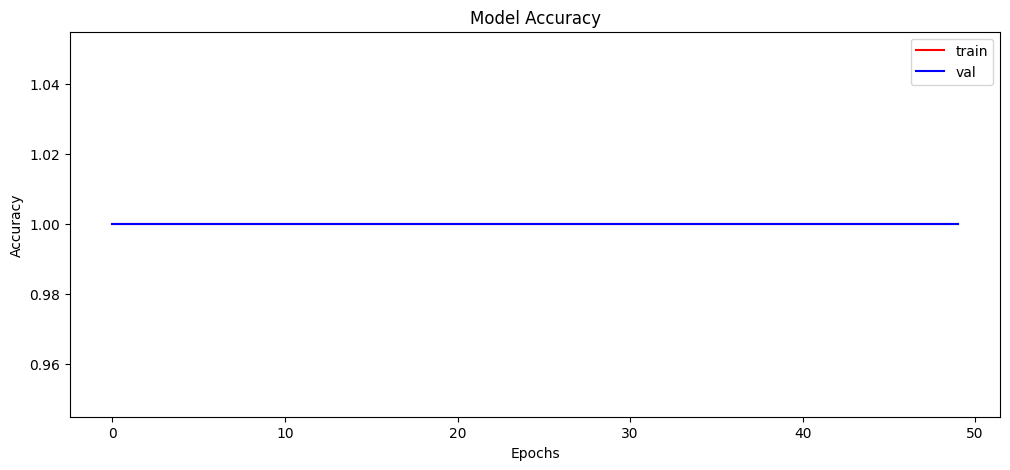

In [111]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [115]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 3, 2), output.shape=(None, 3)

### Make predictions on testing data

In [113]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


### Visualizing the original and predicted labels for the test images

In [114]:
print(x_test.shape)  # Check the shape of the array

# Check the available index
if x_test.shape[0] > 0:
    img = array_to_img(x_test[0])  # Use index 0 instead of 11
    img.show()  # Display the image
else:
    print("x_test is empty.")

# Check the size of x_test
print("Shape of x_test:", x_test.shape)

# Plotting image to compare
if x_test.shape[0] > 0:
    img = array_to_img(x_test[0])  # Use the first image for demonstration
    img.show()  # Display the image
else:
    print("No images available in x_test.")



(1, 256, 256, 3)
Shape of x_test: (1, 256, 256, 3)


In [70]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

IndexError: index 11 is out of bounds for axis 0 with size 1

In [73]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [103]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Check if y_pred has predictions for multiple samples or just one
if len(y_pred.shape) == 1:
    y_pred = np.expand_dims(y_pred, axis=0)  # Add batch dimension if missing

# Iterate through the predictions and print corresponding labels
for i in range(min(50, len(y_test), len(y_pred))):
    print(all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred[i])])



y_test shape: (1, 3, 2)
y_pred shape: (1, 3)
Corn-Common_rust   Tomato-Bacterial_spot
